<a href="https://colab.research.google.com/github/NetraBatwe/MNIST-Digit-Classifier/blob/main/Single_layer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install idx2numpy

In [ ]:
import idx2numpy
from google.colab import drive 
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/DATA")

Mounted at /content/drive


In [ ]:
import gzip
import idx2numpy
import numpy as np

In [ ]:
with gzip.open('/content/drive/My Drive/DATA/train-images.idx3-ubyte.gz', 'rb') as f:
    x_train = idx2numpy.convert_from_file(f)

with gzip.open('/content/drive/My Drive/DATA/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = idx2numpy.convert_from_file(f)

with gzip.open('/content/drive/My Drive/DATA/t10k-images-idx3-ubyte.gz', 'rb')  as f:
    x_test = idx2numpy.convert_from_file(f)

with gzip.open('/content/drive/My Drive/DATA/t10k-labels-idx1-ubyte.gz', 'rb')  as f:
    y_test = idx2numpy.convert_from_file(f)

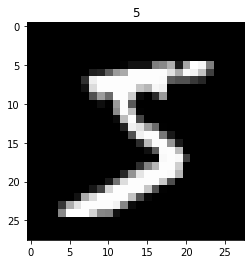

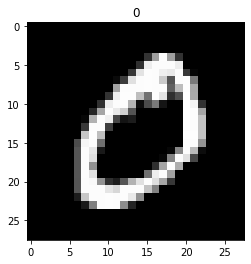

In [ ]:
import matplotlib.pyplot as plt
sample=0
for sample in range (2):
   plt.title(y_train[sample])
   plt.imshow(x_train[sample],cmap='gray')
   plt.show()
  

In [ ]:
x_train=np.resize(x_train,(28*28,60000))
print(x_train.shape)
x=x_train.shape[0]
x_train=(x_train)/255
h1=128
y=np.zeros((10,60000))
for m in range(60000):
   for j in range(10):
     if(j == y_train[m]):
       y[j][m]=1
m=60000
l=0
c=np.zeros(1000)
y[0]

In [ ]:

w1=np.random.randn(h1,x)*0.01
b1=np.zeros((h1,1))
z1=np.dot(w1,x_train)+b1

w2=np.random.randn(10,h1)*0.01
b2=np.zeros((10,1))

#print(x_train.shape)
for i in range(1000):
 d=np.exp(-z1)
 a1=1/(1+d)
 
 #w2=np.transpose(w2)
 z2=np.dot(w2,a1)+b2
 d3=np.exp(z2)
 d4=np.sum(d3, axis=0)
 a2=d3/d4
 l=-np.sum(y*(np.log(a2)), axis=0)
 c[i]=np.sum(l)/m

 if(i%10==0):
  print(c[i])

 dz2=a2-y
 dz2t=np.transpose(dz2)
 #print(dz2.shape)

 dw2=np.dot(a1,dz2t)/m
 db2=np.sum(dz2,axis=1,keepdims=True)/m

 da1=np.dot(dw2,dz2)
 dz1=(da1*a1)*(1-a1)
 dz1=np.transpose(dz1)
 dw1=np.dot(x_train,dz1)/m
 db1=np.sum(dz1,axis=1,keepdims=True)/m

 dw1t=np.transpose(dw1)
 dw2t=np.transpose(dw2)
 db1t=np.transpose(db1)
# db2t=np.transpose(db2)
 learning_rate=0.001
 w1=w1-learning_rate*dw1t
 w2=w2-learning_rate*dw2t
 b1=b1-learning_rate*db1t
 b2=b2-learning_rate*db2


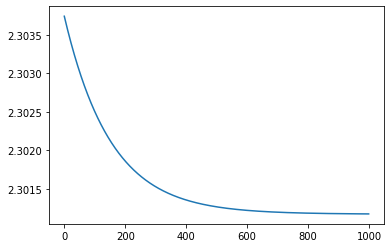

In [ ]:
plt.plot(c)
plt.show()

In [ ]:
a=np.zeros(100)
x_test=x_test/255
x_test= np.resize(x_test,(28*28,10000))
for i in range (100):
 x=x_test

 z1=np.dot(w1,x)+b1
 d=np.exp(-z1)
 a1=1/(1+d)

 z2=np.dot(w2,a1)+b2
 d3=np.exp(z2)
 d4=np.sum(d3, axis=0)
 a2=d3/d4

 for k in range (100):
   a[k]=x_label[i]-a2

print(np.sum(a))